# CHANGEME: Location - Data type

CHANGEME: A few sentences about the data and links to the original data providers.

**Source:** CHANGEME

**License:** CHANGEME (include a link to where the license is stated if possible)

## Notes

CHANGEME: Any relevant notes about this dataset, such as data format, original coordinate systems, or anything else that's relevant.

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import verde as vd
import pooch

## Download the data

Use [Pooch](https://github.com/fatiando/pooch) to download the original data file to our computer.

In [2]:
fname = pooch.retrieve(
    url="https://gml.noaa.gov/webdata/ccgg/trends/co2/co2_mm_mlo.txt",
    known_hash="sha256:01b7df0113305e207c25df77e98ee9bd4477d0ba127b9b78594dd720f5f973ed",
)
print(f"size: {os.path.getsize(fname) / 1e6} Mb")

size: 0.056427 Mb


## Read the data

Use pandas to read the data.

In [3]:
data = pd.read_csv(
    fname, 
    comment="#", 
    delim_whitespace=True, 
    names="year month year_decimal monthly_average deseasonalized number_of_days std uncertainty".split(),
)
data

,year,month,year_decimal,monthly_average,deseasonalized,number_of_days,std,uncertainty
0,1958,3,1958.2027,315.70,314.43,-1,-9.99,-0.99
1,1958,4,1958.2877,317.45,315.16,-1,-9.99,-0.99
2,1958,5,1958.3699,317.51,314.71,-1,-9.99,-0.99
3,1958,6,1958.4548,317.24,315.14,-1,-9.99,-0.99
4,1958,7,1958.5370,315.86,315.18,-1,-9.99,-0.99
...,...,...,...,...,...,...,...,...
761,2021,8,2021.6250,414.47,416.49,26,0.72,0.27
762,2021,9,2021.7083,413.30,416.90,27,0.29,0.11
763,2021,10,2021.7917,413.93,417.31,29,0.35,0.12
764,2021,11,2021.8750,415.01,417.06,30,0.36,0.13


## Plot the data 

Make a quick plot to make sure the data look OK. This plot will be used as a preview of the dataset.

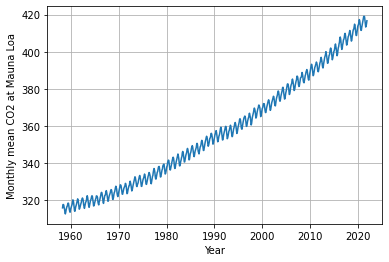

In [4]:
plt.figure()
plt.plot(data.year_decimal, data.monthly_average)
plt.grid()
plt.xlabel("Year")
plt.ylabel("Monthly mean CO2 at Mauna Loa")
plt.savefig("preview.jpg")
plt.show()

## Export

Make a separate DataFrame to export to a compressed CSV. The conversion is needed to specify the number of significant digits to preserve in the output. Setting this along with the LZMA compression can help reduce the file size considerably. Not all fields in the original data need to be exported.

In [5]:
export = pd.DataFrame({
    "year_decimal": data.year_decimal.map(lambda x: "{:.4f}".format(x)),
    "monthly_average": data.monthly_average.map(lambda x: "{:.2f}".format(x)),   
})
export

,year_decimal,monthly_average
0,1958.2027,315.70
1,1958.2877,317.45
2,1958.3699,317.51
3,1958.4548,317.24
4,1958.5370,315.86
...,...,...
761,2021.6250,414.47
762,2021.7083,413.30
763,2021.7917,413.93
764,2021.8750,415.01


Save the data to a file and calculate the size and MD5/SHA256 hashes.

In [6]:
output = "mauna-loa-co2.csv.xz"
export.to_csv(output, index=False)
print(f"file: {output}")
print(f"size: {os.path.getsize(output) / 1e6} Mb")
for alg in ["md5", "sha256"]:
    print(f"{alg}:{pooch.file_hash(output, alg=alg)}")

file: mauna-loa-co2.csv.xz
size: 0.002132 Mb
md5:7095047376c4983cca627e52aa5b28de
sha256:10fa809c3d2e27764543298b3677a727ac833b15c5ba1830e481e5df9a341d78


## Read back the data and plot it

Verify that the output didn't corrupt anything.

In [7]:
data_reloaded = pd.read_csv(output)
data_reloaded

,year_decimal,monthly_average
0,1958.2027,315.70
1,1958.2877,317.45
2,1958.3699,317.51
3,1958.4548,317.24
4,1958.5370,315.86
...,...,...
761,2021.6250,414.47
762,2021.7083,413.30
763,2021.7917,413.93
764,2021.8750,415.01


Make the figure again but don't save it to a file this time.

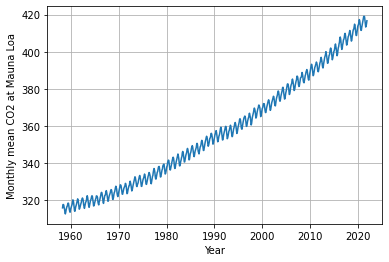

In [8]:
plt.figure()
plt.plot(data_reloaded.year_decimal, data_reloaded.monthly_average)
plt.grid()
plt.xlabel("Year")
plt.ylabel("Monthly mean CO2 at Mauna Loa")
plt.show()